<h2 style="color:purple">Exploratory Analysis and Key Insights</h2>

## Import Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Loading the Clean 30 mph DataFrame from CSV**

In [6]:
df_cleaned = pd.read_csv(f'data/30mph_accident_clean_data.csv', low_memory=False)

In [7]:
df_cleaned.head()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,road_type,...,weather_conditions,road_surface_conditions,urban_or_rural_area,vehicle_type,age_of_driver,age_band_of_driver,month,day,hour,slight
0,2019,-0.153842,51.508057,Slight,2,3,2019-02-18,Monday,1900-01-01 17:50:00,Roundabout,...,Clear,Dry,Urban,Car,58,56 - 65,2,18,17,1
1,2019,-0.127949,51.436208,Slight,2,1,2019-01-15,Tuesday,1900-01-01 21:45:00,One_Way,...,Clear,Dry,Urban,Car,24,21 - 25,1,15,21,1
2,2019,-0.124193,51.526795,Slight,2,1,2019-01-01,Tuesday,1900-01-01 01:50:00,Single,...,Clear,Dry,Urban,Car,45,36 - 45,1,1,1,1
3,2019,-0.124193,51.526795,Slight,2,1,2019-01-01,Tuesday,1900-01-01 01:50:00,Single,...,Clear,Dry,Urban,Bicycle,33,26 - 35,1,1,1,1
4,2019,-0.200064,51.541121,Slight,2,2,2019-01-01,Tuesday,1900-01-01 00:40:00,Single,...,Clear,Dry,Urban,Car,47,46 - 55,1,1,0,1


In [8]:
df_cleaned.number_of_casualties.unique()

array([3, 1, 2, 4, 6, 5, 7, 8])

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420980 entries, 0 to 420979
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   accident_year            420980 non-null  int64  
 1   longitude                420980 non-null  float64
 2   latitude                 420980 non-null  float64
 3   accident_severity        420980 non-null  object 
 4   number_of_vehicles       420980 non-null  int64  
 5   number_of_casualties     420980 non-null  int64  
 6   date                     420980 non-null  object 
 7   day_of_week              420980 non-null  object 
 8   time                     420980 non-null  object 
 9   road_type                420980 non-null  object 
 10  junction_detail          420980 non-null  object 
 11  junction_control         420980 non-null  object 
 12  light_conditions         420980 non-null  object 
 13  weather_conditions       420980 non-null  object 
 14  road

## Data Exploration and Visualization

### Accident Severity Distribution

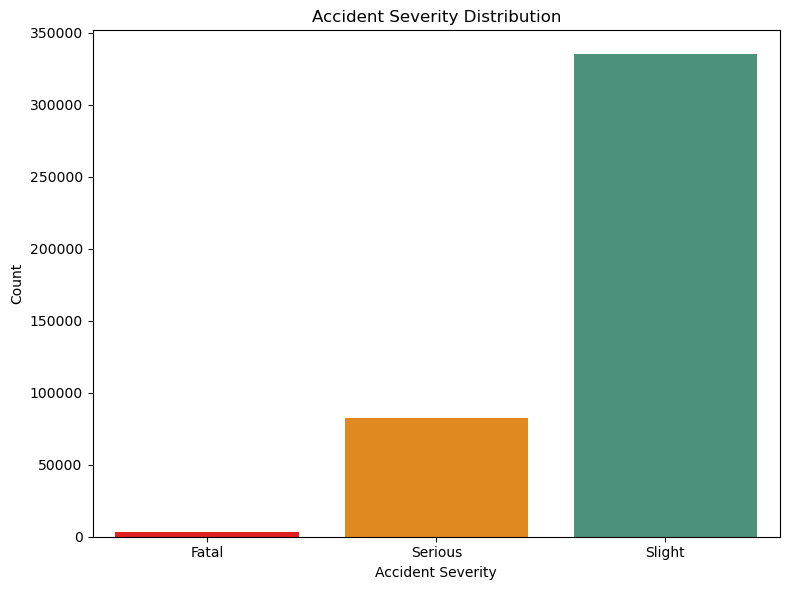

In [12]:
# Set target column
target_column = 'accident_severity'
palette = {'Slight': '#3f9d7f', 'Serious': '#FF8C00', 'Fatal': '#FF0000'}  # Custom colors for each severity

# Create a crosstab for counts of Accident Severity
crosstab = pd.crosstab(index=df_cleaned[target_column], columns='count')

# Bar chart for Accident Severity distribution
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=crosstab.index, y=crosstab['count'], palette=palette, ax=ax)
ax.set_title('Accident Severity Distribution')
ax.set_xlabel('Accident Severity')
ax.set_ylabel('Count')
ax.grid(False)  # Remove gridlines
plt.tight_layout()
plt.show()


**Insight:** Figure shows the severity distribution of accidents: approximately 330,000 slight, 80,000 serious, and 3,500 fatal accidents. This pyramid pattern indicates that safety systems often prevent more serious outcomes.

### Accident Distribution by Road Type

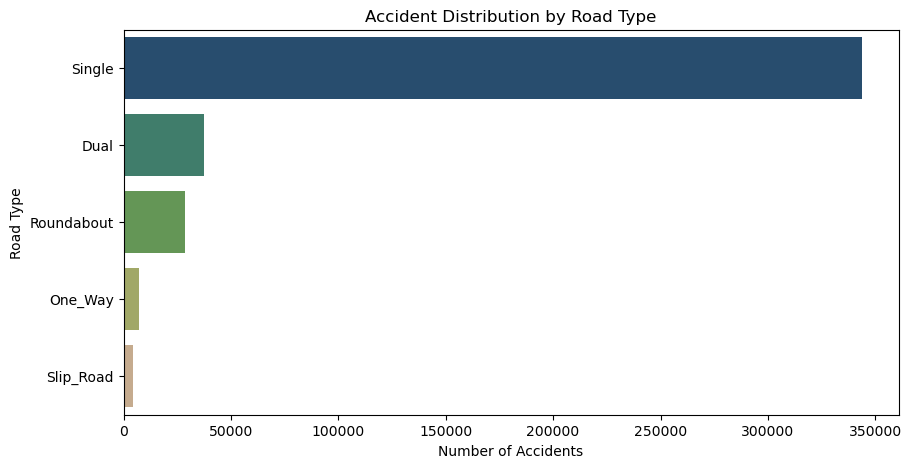

In [15]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_cleaned, y='road_type', order=df_cleaned['road_type'].value_counts().index, palette='gist_earth')
plt.title('Accident Distribution by Road Type', fontsize=12)
plt.xlabel('Number of Accidents')
plt.ylabel('Road Type')
plt.grid(False)
plt.show()

**Insight:**
Figure shows accident distribution by road type. Single-carriageways lead with 330,000 accidents, followed by dual-carriageways and roundabouts at 35,000 each. One-way streets and slip roads have few incidents, at 8,000 and 3,000, emphasising single carriageways' safety issues concern.

### Accident Distribution by Junction Detail

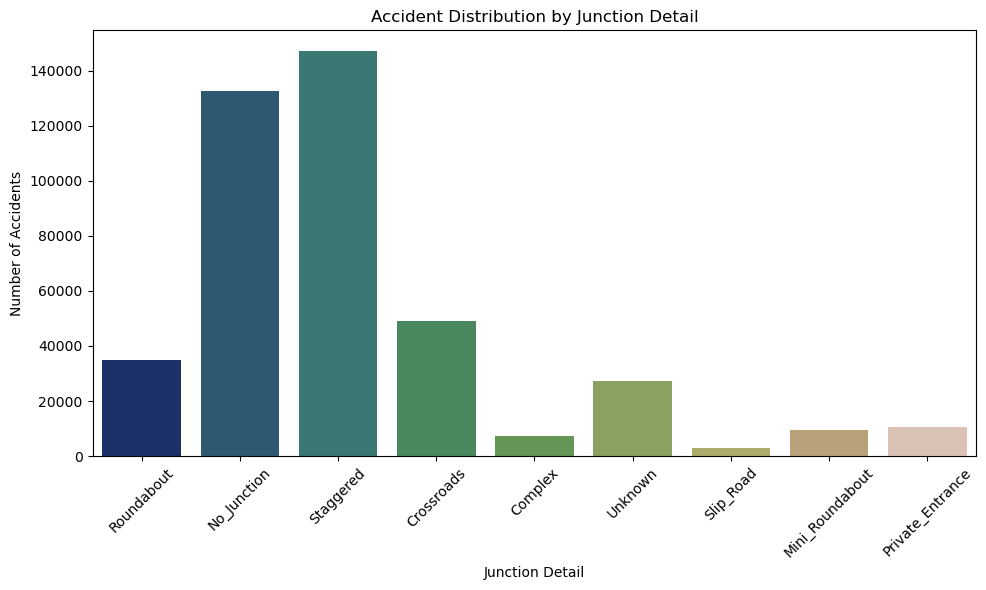

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='junction_detail', data=df_cleaned, palette='gist_earth', ax=ax)
ax.set_title('Accident Distribution by Junction Detail')
ax.set_xlabel('Junction Detail')
ax.set_ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

**Insight:** Figure depicts junction accident distribution: staggered (145,000) and no junctions (130,000) dominate, followed by crossroads (48,000) and roundabouts (35,000). Other junction types show fewer than 30,000 accidents each.

### Accident Distribution by Junction Control

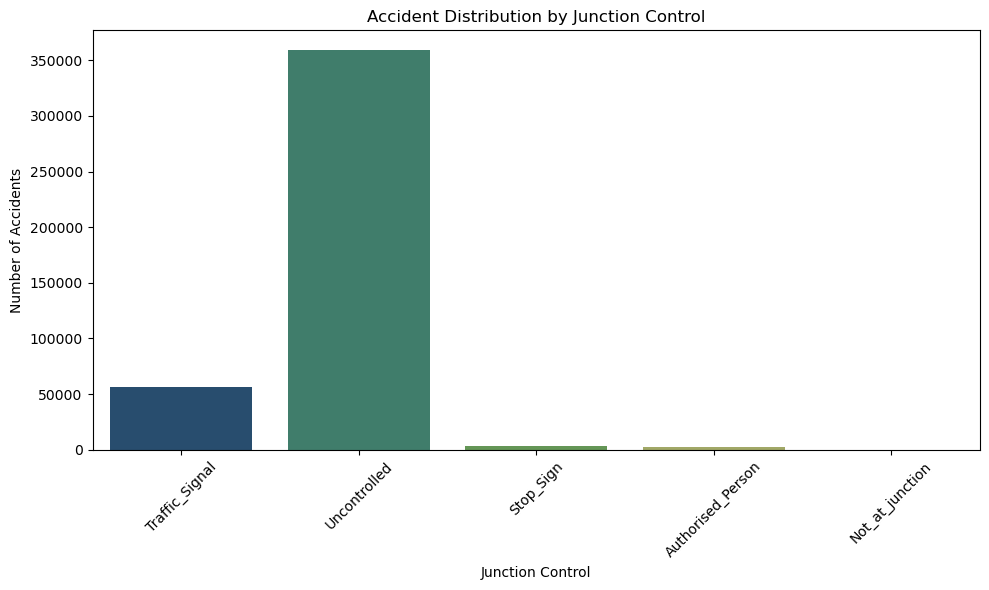

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='junction_control', data=df_cleaned, palette='gist_earth', ax=ax)
ax.set_title('Accident Distribution by Junction Control')
ax.set_xlabel('Junction Control')
ax.set_ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

**Insight:** 
Figure shows the distribution of junction control accidents: Uncontrolled junctions have the most accidents, with 355,000, followed by traffic signals (55,000). Stop signs, authorized persons, and non-junction areas each record fewer than 5,000 incidents, indicating that controlled intersections have significantly fewer accidents.

### Accident Distribution by Road Surface Conditions

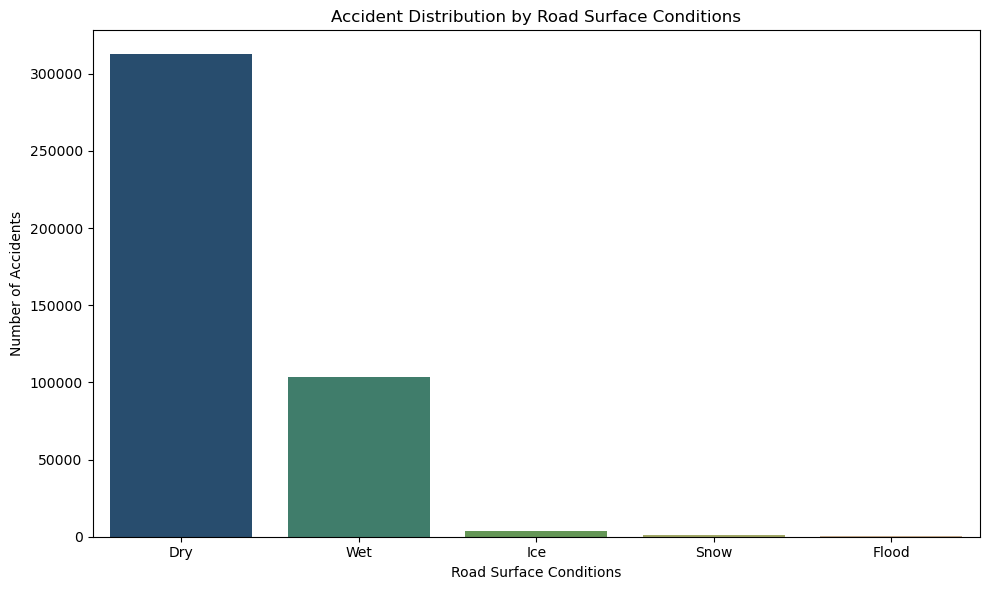

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting 'road_surface_conditions'
sns.countplot(x='road_surface_conditions', data=df_cleaned, palette='gist_earth', ax=ax)
ax.set_title('Accident Distribution by Road Surface Conditions')
ax.set_xlabel('Road Surface Conditions')
ax.set_ylabel('Number of Accidents')
plt.tight_layout()
plt.grid(False)
plt.show()

**Insight:** Figure shows the distribution of road surface accidents: dry conditions account for 310,000 accidents, wet conditions for 100,000, and ice, snow, and flood conditions each record fewer than 5,000 incidents. Most accidents occur in normal dry conditions rather than adverse weather

### Accident Severity by Urban and Rural Areas

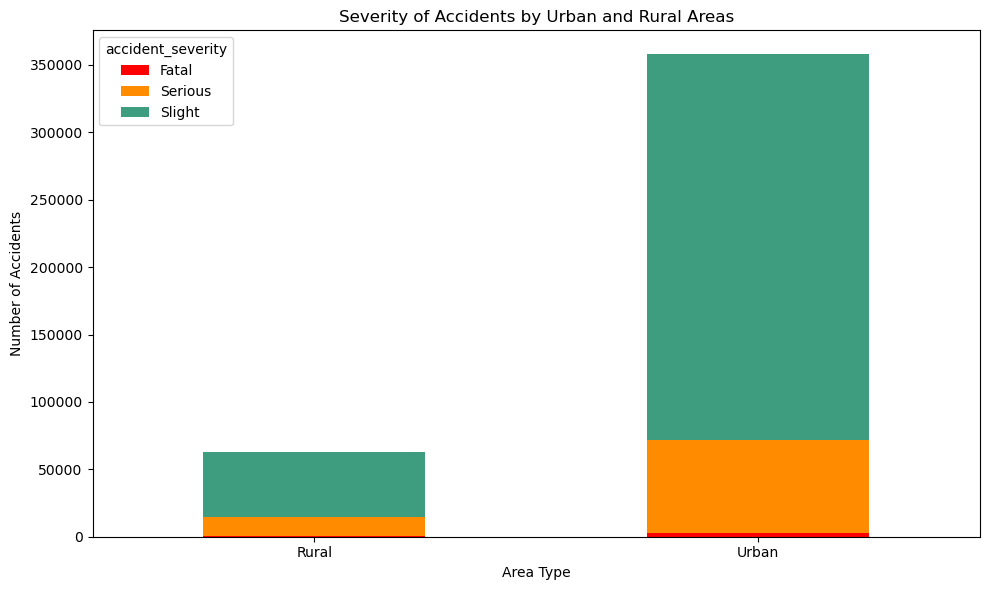

In [27]:
# Grouping by 'Urban_Or_Rural_Area' and 'Accident_Severity'
severity_by_area = df_cleaned.groupby(['urban_or_rural_area', 'accident_severity']).size().reset_index(name='Count')

# Pivot to arrange data for plotting
severity_pivot = severity_by_area.pivot(index='urban_or_rural_area', columns='accident_severity', values='Count').fillna(0)

# Plotting a stacked bar chart with specified palette
ax = severity_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=[palette[severity] for severity in severity_pivot.columns])
plt.title('Severity of Accidents by Urban and Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()


**Insight:** compares accident severity in urban and rural areas. Urban areas report about 355,000 accidents (285,000 slight, 70,000 serious), while rural areas have around 60,000 (45,000 slight, 15,000 serious). Urban areas see higher total accident frequency likely due to denser traffic populations.

### Accident Severity by Weather Conditions

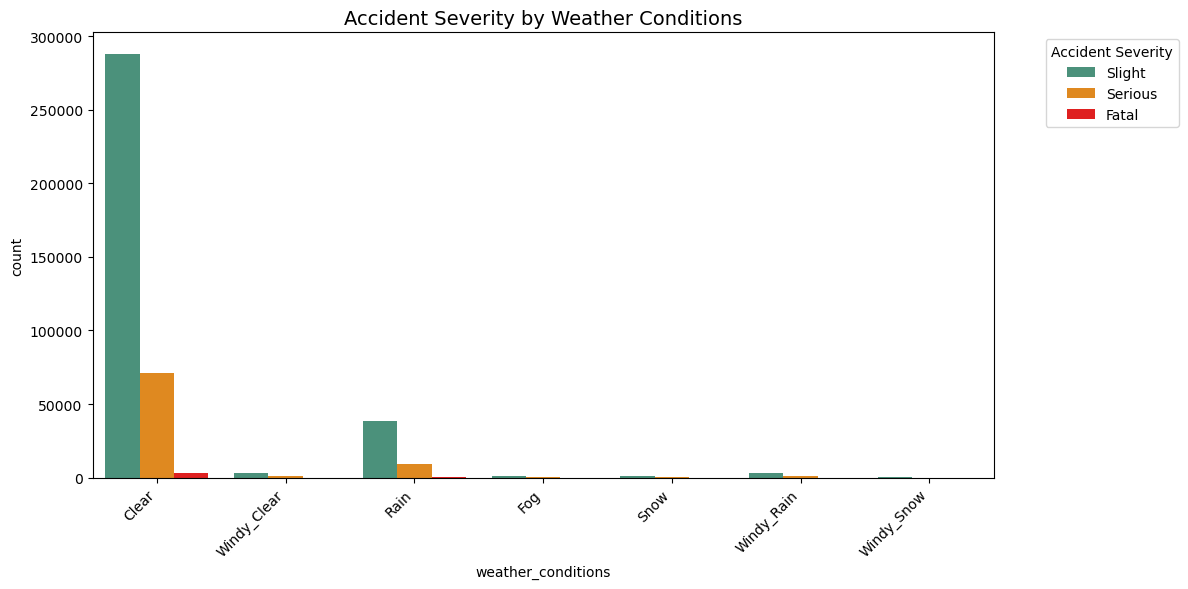

In [30]:
# Create the count plot excluding 'Unknown' in weather_conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='weather_conditions', hue='accident_severity', palette=palette)
plt.title('Accident Severity by Weather Conditions', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()

**Insight:** Figure reveals accident severity across weather conditions: clear weather dominates with 285,000 slight, 70,000 serious, and 3,000 fatal accidents. Rain shows 35,000 slight and 8,000 serious incidents, while other conditions (fog, snow, windy) record minimal accidents across all severity levels.

### Accident Severity by Light Conditions

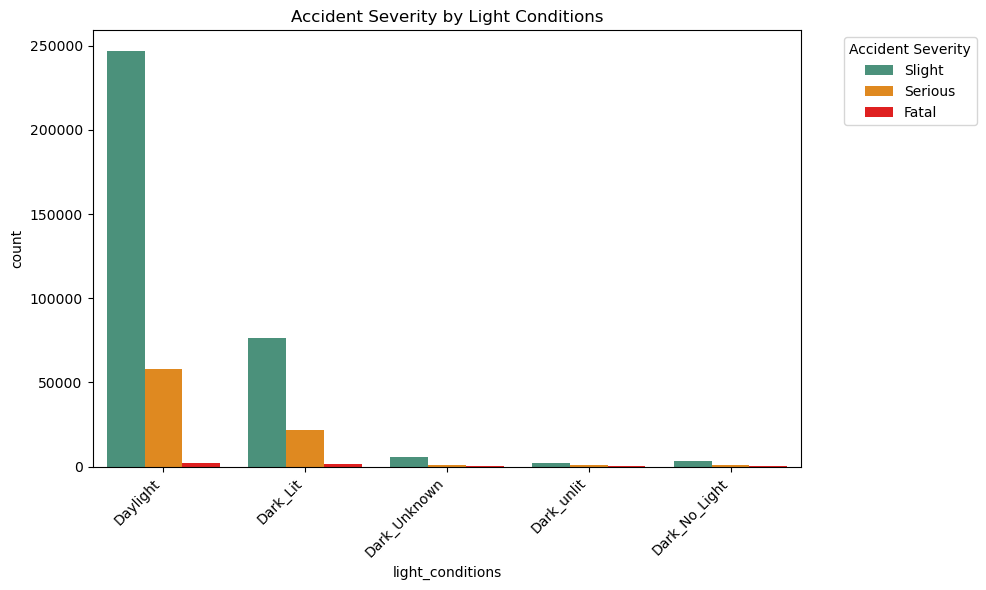

In [33]:
# Plotting Accident Severity by Light Conditions, excluding 'Unknown'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='light_conditions', hue='accident_severity', palette=palette) 
plt.title('Accident Severity by Light Conditions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()

**Insight:**
Figure shows accidents by light conditions: daylight accounts for most incidents (245,000 slight, 55,000 serious, 2,000 fatal), followed by darkness with lit roads (75,000 slight, 20,000 serious). Other dark conditions show minimal accidents.

### Accident Severity by Vehicle Type

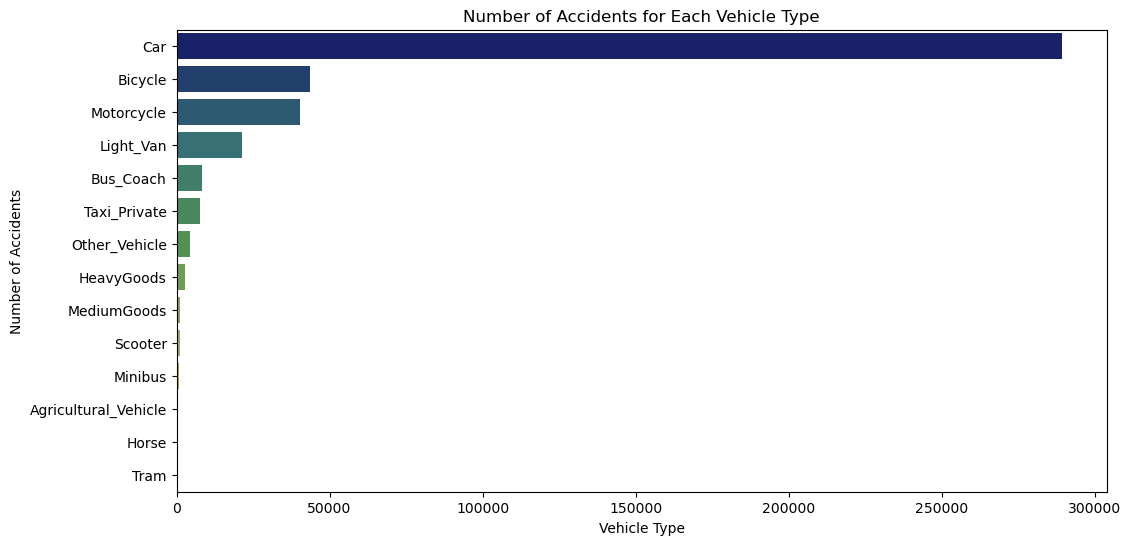

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, y='vehicle_type', order=df_cleaned['vehicle_type'].value_counts().index, palette='gist_earth')
plt.title('Number of Accidents for Each Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

**Insight**
Figure shows accident distribution by vehicle type: cars are most frequently involved (290,000), followed by bicycles (45,000), motorcycles (40,000), and light vans (20,000). Buses/coaches, taxis, and other vehicle types each account for fewer than 10,000 accidents

### Accident Severity by Age Band of Driver

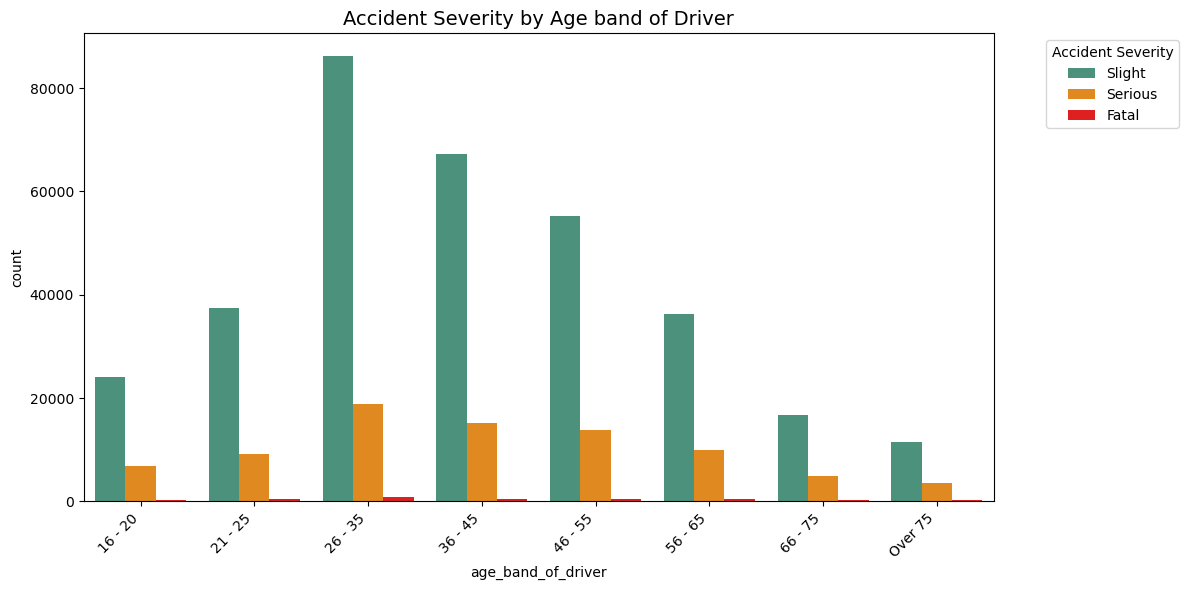

In [39]:
# Define the correct order for age bands
age_band_order = ['16 - 20', '21 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65', '66 - 75', 'Over 75']

# Convert the 'age_band_of_driver' column to a categorical type with the specified order
df_cleaned['age_band_of_driver'] = pd.Categorical(df_cleaned['age_band_of_driver'], categories=age_band_order, ordered=True)

# Create the count plot with sorted age bands
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='age_band_of_driver', hue='accident_severity', palette=palette)
plt.title('Accident Severity by Age band of Driver', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()

### Number of Vehicles Involved in Accidents

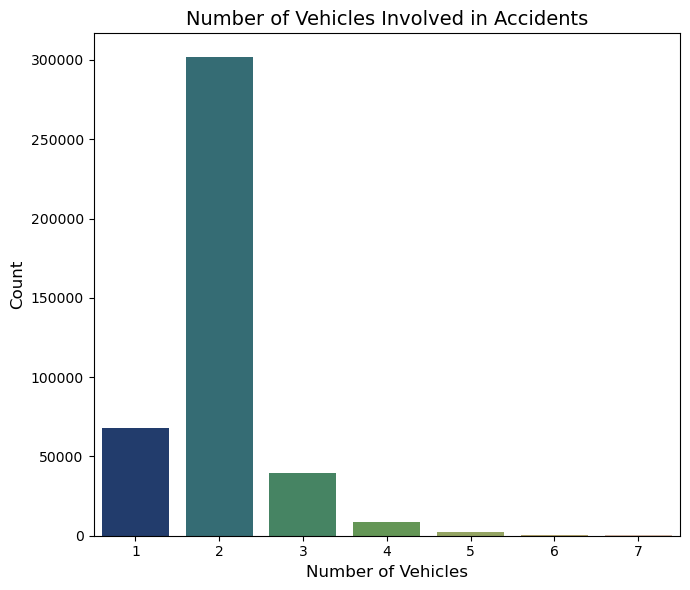

In [41]:
# Countplot for Number of Vehicles
plt.figure(figsize=(7, 6))
sns.countplot(data=df_cleaned, x='number_of_vehicles', palette='gist_earth')
plt.title('Number of Vehicles Involved in Accidents', fontsize=14)
plt.xlabel('Number of Vehicles', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

**Insight:** Figure shows vehicle involvement in accidents: two-vehicle collisions dominate (300,000), followed by single-vehicle accidents (65,000) and three-vehicle incidents (35,000). Accidents involving four or more vehicles are rare.

### Number of Casualties Involved in Accidents

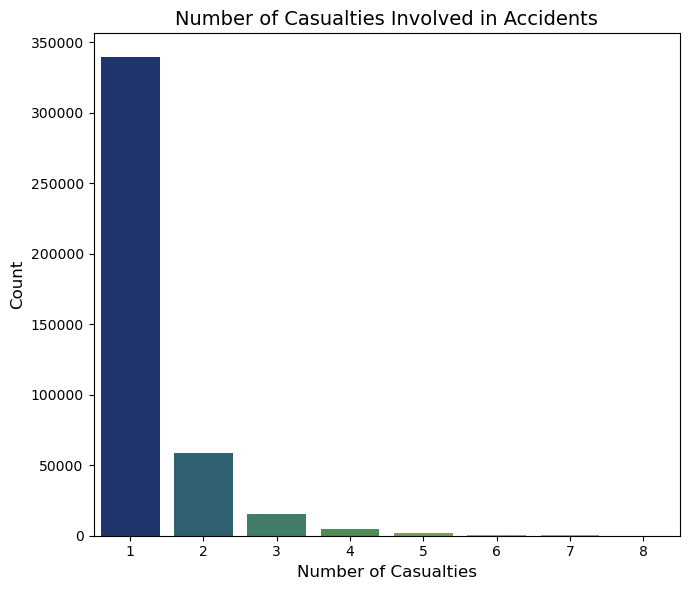

In [44]:
# Countplot for Number of Casualties
plt.figure(figsize=(7, 6))
sns.countplot(data=df_cleaned, x='number_of_casualties', palette='gist_earth')
plt.title('Number of Casualties Involved in Accidents', fontsize=14)
plt.xlabel('Number of Casualties', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

**Insight:** Figure shows casualty distribution in accidents: single-casualty incidents are highest (340,000), followed by two casualties (60,000) and three casualties (15,000). Accidents with four or more casualties are rare (<5,000 each), with very few cases exceeding 5 casualties.

### Trends in Accident Counts Over Years

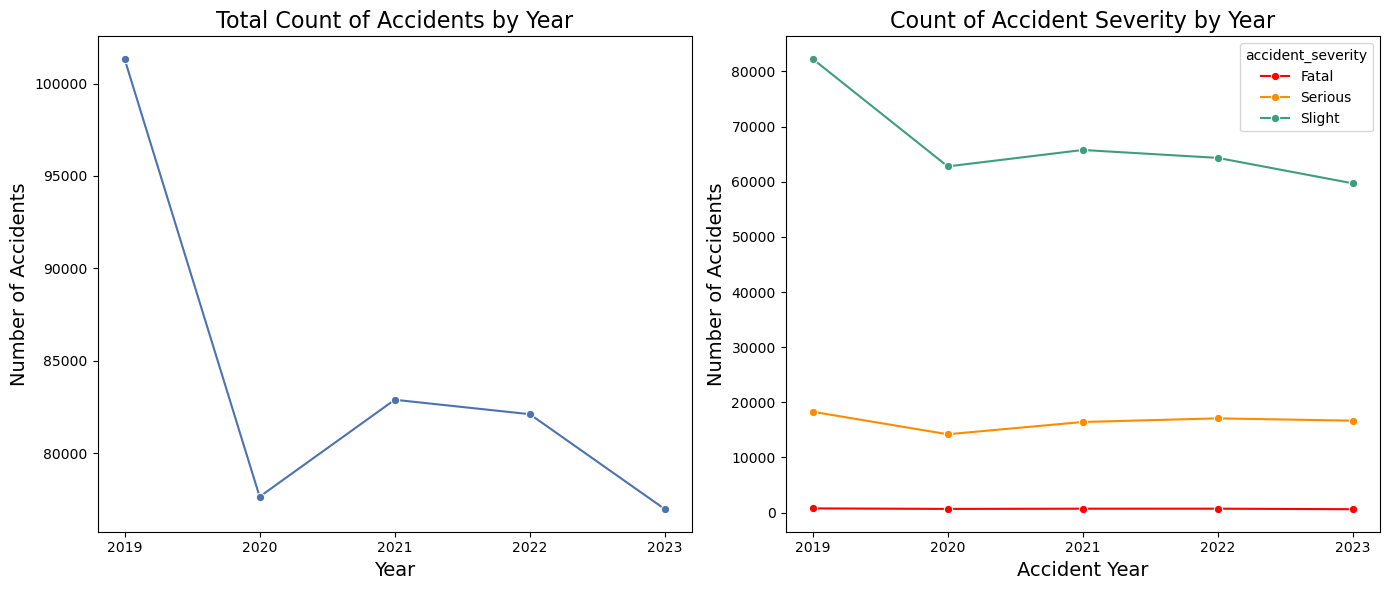

In [87]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Count of Accidents by Year
year_counts = df_cleaned['accident_year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts, marker='o', color=sns.color_palette('deep')[0], ax=ax[0])
ax[0].set_title('Total Count of Accidents by Year', fontsize=16)
ax[0].set_xlabel('Year', fontsize=14)
ax[0].set_ylabel('Number of Accidents', fontsize=14)
ax[0].set_xticks(year_counts.index)  # Set x-ticks to match year counts
ax[0].grid(False)  # Remove gridlines

# Plot 2: Count of Accident Severity by Year
year_severity_counts = df_cleaned.groupby(['accident_year', 'accident_severity']).size().reset_index(name='Count')
sns.lineplot(data=year_severity_counts, x='accident_year', y='Count', hue='accident_severity', marker='o', ax=ax[1], palette=palette)

ax[1].set_title('Count of Accident Severity by Year', fontsize=16)
ax[1].set_xlabel('Accident Year', fontsize=14)
ax[1].set_ylabel('Number of Accidents', fontsize=14)
ax[1].set_xticks(year_severity_counts['accident_year'].unique())  # Set x-ticks to match year counts
ax[1].grid(False)  # Remove gridlines

plt.tight_layout()
plt.show()

**Insight:** Figures shows accident trends from 2019 to 2023. Total accidents decreased from 101,000 in 2019 to 77,000 in 2020, likely due to COVID-19. It then increased to 82,000 (2021) and decreased slightly to 81,000 (2022) before falling to 77,000 in 2023. Slight accidents dropped from 82,000 to 62,000, while serious and fatal accidents remained relatively the same.

### Trends in Accident Counts Over Months

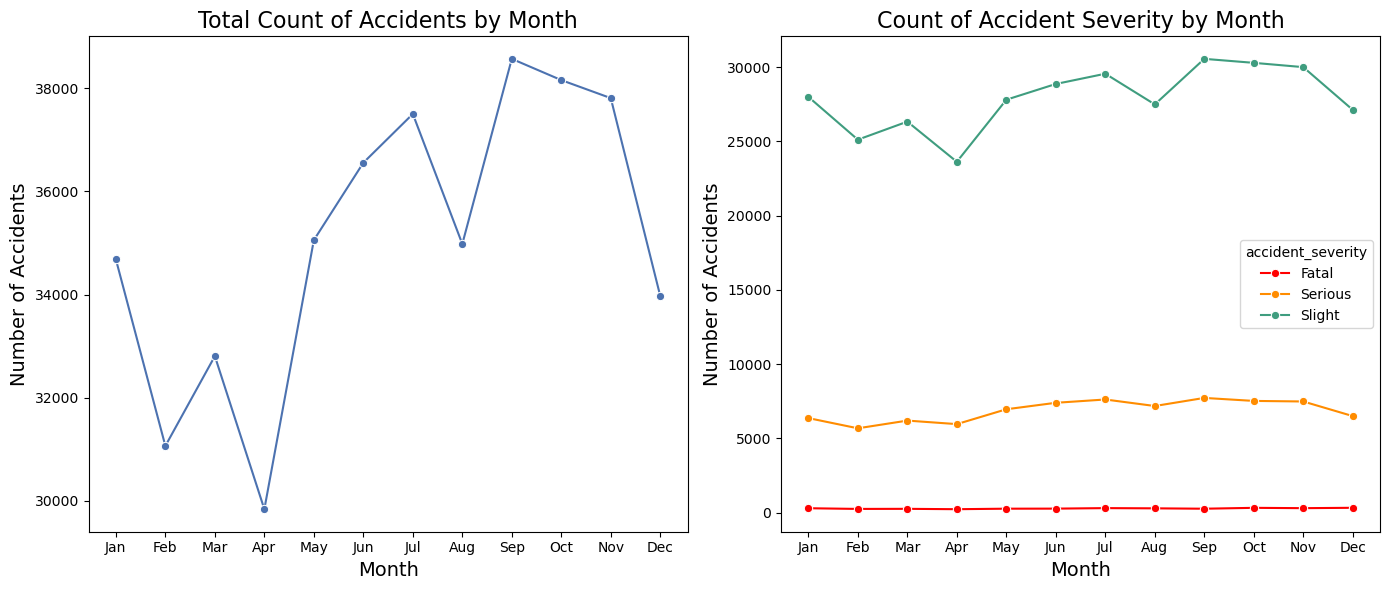

In [90]:
# Map month numbers to names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Count of Accidents by Month using lineplot
monthly_counts = df_cleaned['month'].value_counts().reindex(range(1, 13)).fillna(0)
monthly_counts.index = monthly_counts.index.map(month_names)  # Replace indices with month names

# Create a DataFrame for lineplot
monthly_counts_df = pd.DataFrame({'Month': monthly_counts.index, 'Count': monthly_counts.values})
sns.lineplot(data=monthly_counts_df, x='Month', y='Count', marker='o', color=sns.color_palette('deep')[0], ax=ax[0])
ax[0].set_title('Total Count of Accidents by Month', fontsize=16)
ax[0].set_xlabel('Month', fontsize=14)
ax[0].set_ylabel('Number of Accidents', fontsize=14)
ax[0].grid(False)  # Remove gridlines

# Plot 2: Count of Accident Severity by Month using lineplot
severity_month_counts = df_cleaned.groupby(['month', 'accident_severity']).size().reset_index(name='Count')
severity_month_counts['month'] = severity_month_counts['month'].map(month_names)  # Replace month numbers with names
sns.lineplot(data=severity_month_counts, x='month', y='Count', hue='accident_severity', marker='o', ax=ax[1], palette=palette)
ax[1].set_title('Count of Accident Severity by Month', fontsize=16)
ax[1].set_xlabel('Month', fontsize=14)
ax[1].set_ylabel('Number of Accidents', fontsize=14)
ax[1].grid(False)  # Remove gridlines

plt.tight_layout()
plt.show()

**Insight:**
Figure shows accident peaks in October (38,500) and July (37,500), and lows in April (29,800) and February (31,000). Summer and autumn see more accidents due to increased traffic, while winter and early spring have fewer incidents. Serious and fatal accidents remain relatively stable year-round.

### Distribution of Accident Severity by Day of Week

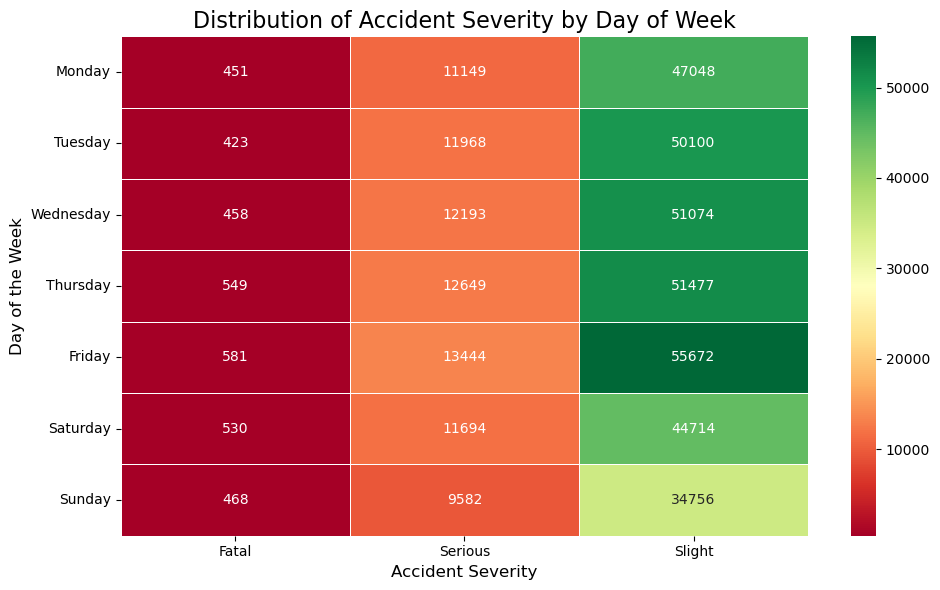

In [93]:
# Grouping by Day of the Week and Accident Severity
day_severity_counts = df_cleaned.groupby(['day_of_week', 'accident_severity'], observed=True).size().unstack(fill_value=0)

# Ensure day order is maintained
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_severity_counts = day_severity_counts.reindex(day_order)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(day_severity_counts, annot=True, fmt='d', cmap='RdYlGn', linewidths=.5)
plt.title('Distribution of Accident Severity by Day of Week', fontsize=16)
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.tight_layout()
plt.show()

**Insight:** Figure illustrates accidents by day of the week and severity. Friday has the highest number of accidents (a total of 69,697 - comprising 55,672 slight, 13,444 serious, and 581 fatal), followed by Thursday (64,675), while Sunday records the fewest accidents (44,806). Slight accidents are most prevalent on weekdays, particularly on Fridays.

### Accident Severity by Hour of the Day

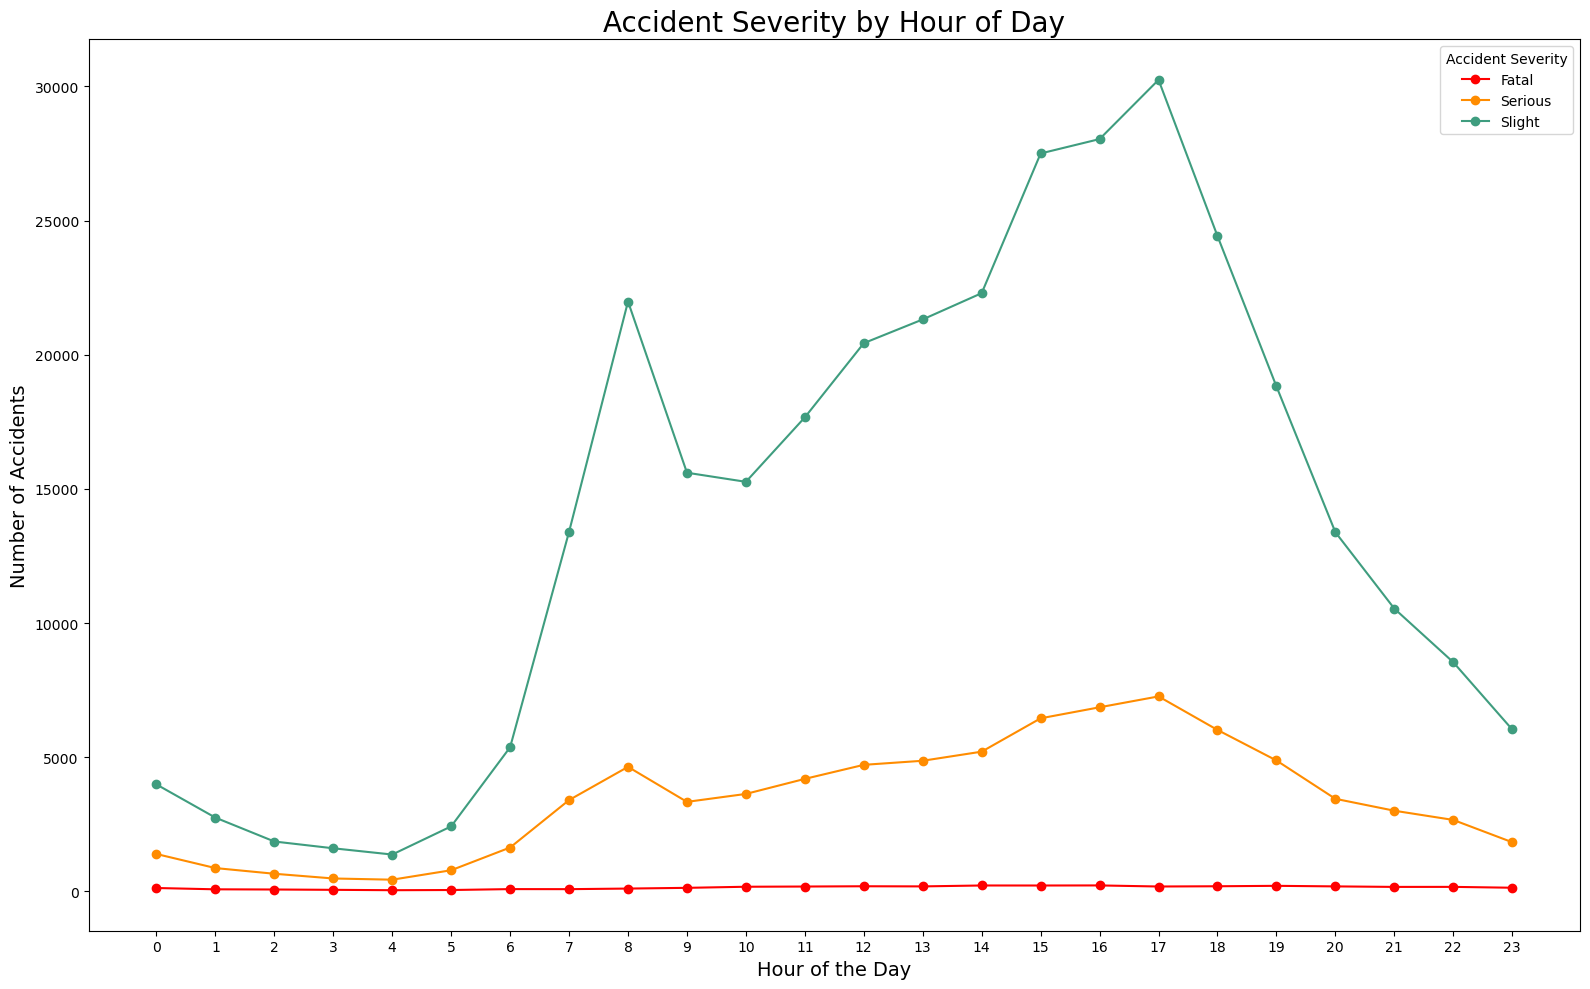

In [96]:
# Grouping by hour and accident severity
severity_by_hour = df_cleaned.groupby(['hour', 'accident_severity'], observed=True).size().unstack()

# Plotting the line plot for each severity level
plt.figure(figsize=(16, 10))

# Iterate through each severity level and plot
for severity in severity_by_hour.columns:
    plt.plot(severity_by_hour.index, severity_by_hour[severity], label=severity, marker='o', color=palette[severity])

# Final plot adjustments
plt.title('Accident Severity by Hour of Day', fontsize=20)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(range(0, 24))  # Set x-ticks for hours
plt.grid(False)
plt.legend(title='Accident Severity', loc='upper right')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

**Insight:**
Figure shows Accidents peak during evening rush hour (16:00-17:00) with 30,000 incidents and morning rush hour (08:00) with 22,000 incidents. The lowest volumes occur between 02:00-05:00 (<2,000). Serious accidents follow similar patterns, while fatal accidents remain consistently low.

### Geographical Distribution of Accidents by Severity

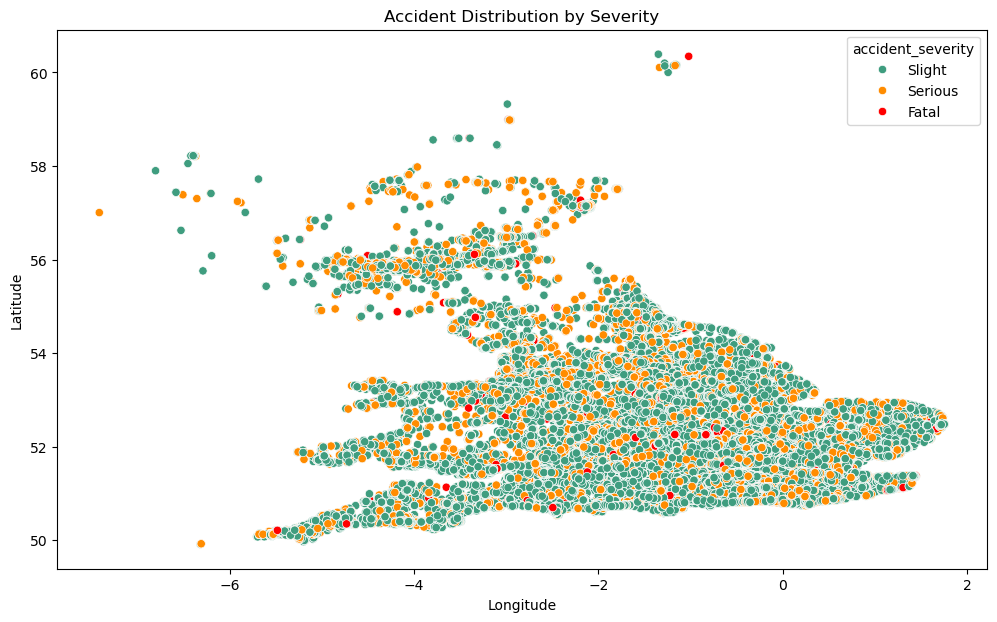

In [99]:
# Visualization for 'Latitude' and 'Longitude'
plt.figure(figsize=(12, 7))

# Scatter plot
sns.scatterplot(x='longitude', y='latitude', data=df_cleaned, hue='accident_severity', palette=palette)
plt.title('Accident Distribution by Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Insight:** Figure illustrates that accidents in the UK's southeast (longitude -2 to 2, latitude 50 to 54) are mostly slight (green), with scattered serious (orange) and fatal (red) incidents. This indicates a correlation between accident frequency and urban density, as higher accident concentrations occur in metropolitan areas, though severe incidents can happen anywhere.

In [101]:
# Bin latitude and longitude and calculate accident counts
latitude_bins = pd.cut(df_cleaned['latitude'], bins=10)
df_latitude = df_cleaned.groupby(latitude_bins).size().sort_values(ascending=False).head(5)

longitude_bins = pd.cut(df_cleaned['longitude'], bins=10)
df_longitude = df_cleaned.groupby(longitude_bins).size().sort_values(ascending=False).head(5)

# Create DataFrames for formatted tables
latitude_table = pd.DataFrame({
    'Latitude Range': [f"{r.left:.4f} - {r.right:.4f}" for r in df_latitude.index],
    'Latitude Midpoint': [f"{(r.left + r.right) / 2:.4f}" for r in df_latitude.index],
    'Accident Count': df_latitude.values
})

longitude_table = pd.DataFrame({
    'Longitude Range': [f"{r.left:.4f} - {r.right:.4f}" for r in df_longitude.index],
    'Longitude Midpoint': [f"{(r.left + r.right) / 2:.4f}" for r in df_longitude.index],
    'Accident Count': df_longitude.values
})

# Reset index and start from 1
latitude_table.index = range(1, len(latitude_table) + 1)
longitude_table.index = range(1, len(longitude_table) + 1)

# Print tables using tabulate for a cleaner format
print("Top 5 Latitude Ranges with Highest Number of Accidents:")
print(tabulate(latitude_table, headers='keys', tablefmt='pretty'))
print("\nTop 5 Longitude Ranges with Highest Number of Accidents:")
print(tabulate(longitude_table, headers='keys', tablefmt='pretty'))

Top 5 Latitude Ranges with Highest Number of Accidents:
+---+-------------------+-------------------+----------------+
|   |  Latitude Range   | Latitude Midpoint | Accident Count |
+---+-------------------+-------------------+----------------+
| 1 | 50.9620 - 52.0090 |      51.4855      |     170703     |
| 2 | 53.0570 - 54.1040 |      53.5805      |     96452      |
| 3 | 52.0090 - 53.0570 |      52.5330      |     80953      |
| 4 | 49.9040 - 50.9620 |      50.4330      |     38919      |
| 5 | 54.1040 - 55.1510 |      54.6275      |     18467      |
+---+-------------------+-------------------+----------------+

Top 5 Longitude Ranges with Highest Number of Accidents:
+---+-------------------+--------------------+----------------+
|   |  Longitude Range  | Longitude Midpoint | Accident Count |
+---+-------------------+--------------------+----------------+
| 1 | -0.9930 - -0.0762 |      -0.5346       |     108184     |
| 2 | -1.9100 - -0.9930 |      -1.4515       |     102734     |

Based on the provided coordinate ranges and accident counts, the analysis reveals spatial clustering of accidents in key areas of central England. The top latitude range of 50.9620-52.0090 shows the highest concentration with 173,699 accidents, followed by 53.0570-54.1040 with 99,253 accidents. For longitude, the range -0.9930 to -0.0762 records 110,406 accidents, with adjacent ranges showing similarly high numbers.
These coordinate ranges correspond to several high-density urban areas:

- Central England cities and towns
- Greater Manchester region
- West Yorkshire urban areas
- West Midlands metropolitan area
- South Yorkshire region

The data suggests that accident concentrations align with major urban population centers and their surrounding metropolitan areas, particularly in the central and northern regions of England.